Check that q=1 and chi1=chi2 systems have zero odd-m modes.

Well numerically that have 1e-6 or so.

In [44]:
import utils
import numpy as np
import pandas as pd

import copy
import sxs
import phenom

import prim.hybrid
from prim import spliced_pn
from prim.waveform import Waveform
from prim.waveform_generator import generate_waveform

In [45]:
import logging
logging.getLogger('utils').setLevel('INFO')

In [46]:
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['default'])
# plt.style.use(['science', 'notebook', 'bright'])
plt.style.use(['science', 'notebook', 'muted'])

# plt.style.use(['science', 'notebook', 'grid'])

plt.rcParams['text.usetex'] = True

In [47]:
utils.set_lal_data_path()

In [48]:
df = utils.get_aligned_spin_sxs_dataframe()

In [49]:
df_qchi1chi2 = df[['reference_mass_ratio_rounded', 'reference_dimensionless_spin1z_rounded', 'reference_dimensionless_spin2z_rounded']]
df_qchi1chi2 = df_qchi1chi2.rename(columns={'reference_mass_ratio_rounded':'q', 'reference_dimensionless_spin1z_rounded':'chi1', 'reference_dimensionless_spin2z_rounded':'chi2'})

# equal mass
df_qchi1chi2 = df_qchi1chi2[df_qchi1chi2['q'] == 1]
# equal spins
df_qchi1chi2 = df_qchi1chi2[df_qchi1chi2['chi1'] == df_qchi1chi2['chi2']]

df_qchi1chi2

q  chi1  chi2
SXS:BBH:0160  1.0  0.90  0.90
SXS:BBH:0176  1.0  0.96  0.96
SXS:BBH:0328  1.0  0.80  0.80
SXS:BBH:0329  1.0 -0.80 -0.80
SXS:BBH:0389  1.0 -0.00 -0.00
SXS:BBH:1122  1.0  0.44  0.44
SXS:BBH:1123  1.0  0.50  0.50
SXS:BBH:1124  1.0  1.00  1.00
SXS:BBH:1134  1.0 -0.44 -0.44
SXS:BBH:1137  1.0 -0.97 -0.97
SXS:BBH:1154  1.0  0.00  0.00
SXS:BBH:1475  1.0 -0.80 -0.80
SXS:BBH:1477  1.0  0.80  0.80
SXS:BBH:2086  1.0 -0.80 -0.80
SXS:BBH:2089  1.0 -0.60 -0.60
SXS:BBH:2102  1.0  0.60  0.60
SXS:BBH:2104  1.0  0.80  0.80
SXS:BBH:2325  1.0  0.00  0.00
SXS:BBH:2326  1.0  0.00  0.00
SXS:BBH:2375  1.0  0.00  0.00
SXS:BBH:2376  1.0  0.00  0.00
SXS:BBH:2377  1.0  0.00  0.00
SXS:BBH:2378  1.0  0.00  0.00
SXS:BBH:2418  1.0 -0.44 -0.44
SXS:BBH:2419  1.0 -0.20 -0.20
SXS:BBH:2420  1.0  0.20  0.20
SXS:BBH:2421  1.0 -0.60 -0.60
SXS:BBH:2423  1.0  0.85  0.85
SXS:BBH:2424  1.0  0.80  0.80
SXS:BBH:2496  1.0  0.00  0.00
SXS:BBH:2500  1.0  0.25  0.25
SXS:BBH:2505  1.0  0.50  0.50
SXS:BBH:2509  1.0  0.60  0.60
SXS:BBH:2512  1.0  0.70  0.70
SXS:BBH:3624  1.0  0.00  0.00
SXS:BBH:3627  1.0  0.95  0.95
SXS:BBH:3628  1.0  0.97  0.97
SXS:BBH:3632  1.0  0.00  0.00
SXS:BBH:3633  1.0  0.00  0.00
SXS:BBH:3634  1.0  0.00 -0.00
SXS:BBH:3864  1.0 -0.00 -0.00
SXS:BBH:3895  1.0 -0.80 -0.80
SXS:BBH:3897  1.0  0.80  0.80
SXS:BBH:3976  1.0 -0.95 -0.95
SXS:BBH:3978  1.0  0.95  0.95

In [50]:
random_sxs_sim_names = list(df_qchi1chi2.sample(n=3).index)
random_sxs_sim_names

['SXS:BBH:1124', 'SXS:BBH:2325', 'SXS:BBH:3632']

In [51]:
modes = [(2,2), (2,1), (3,3), (3,2), (4,4), (4,3), (5,5), (5,4)]

In [52]:
sxs_wfs = []
for sxs_sim_name in random_sxs_sim_names:
    sxs_bbh = sxs.load(sxs_sim_name, ignore_deprecation=False)
    w = sxs_bbh.h
    # remove junk
    reference_time = sxs_bbh.metadata.reference_time
    reference_index = w.index_closest_to(reference_time)
    w = w[reference_index:]
    sxs_wfs_ = utils.convert_sxs_to_prim_waveform(w, modes)
    sxs_wfs.append(sxs_wfs_)

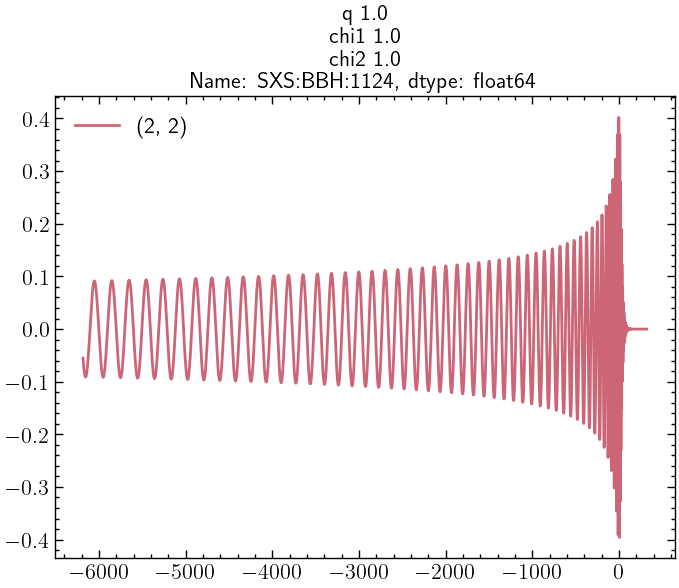

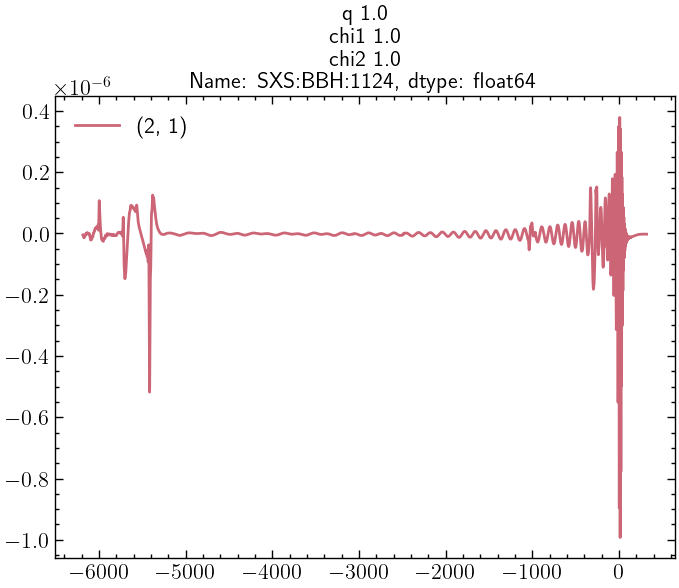

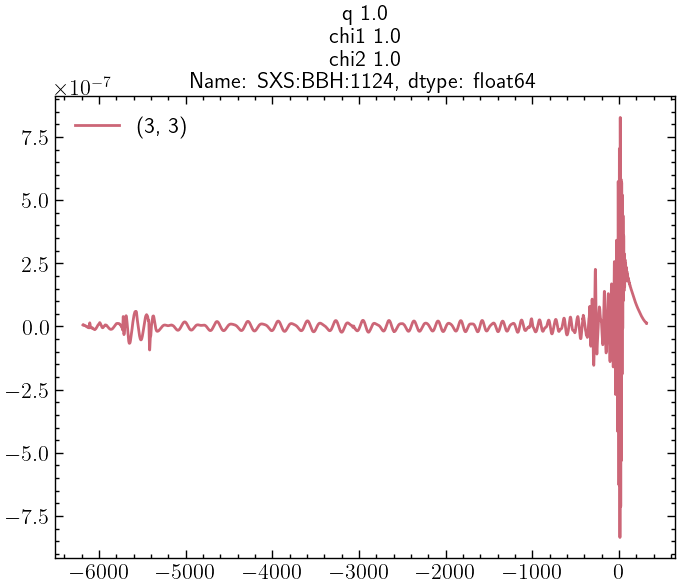

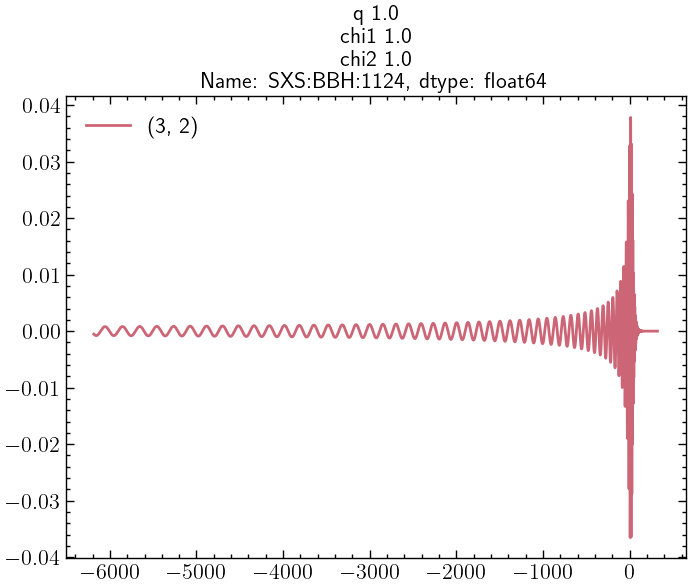

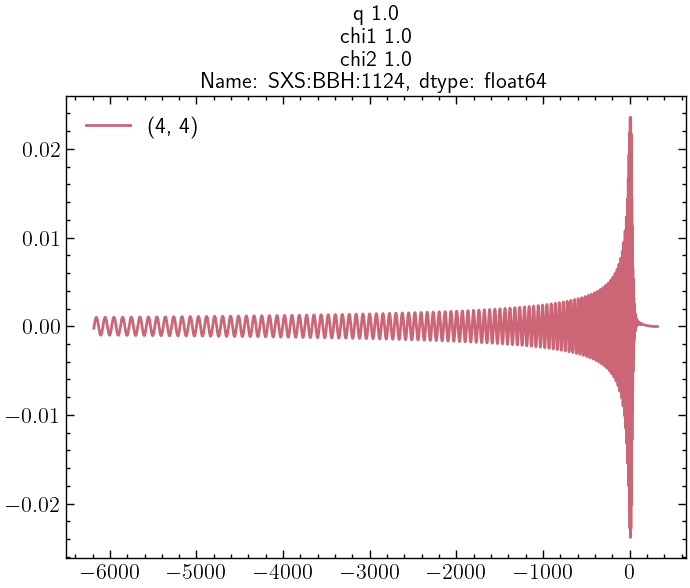

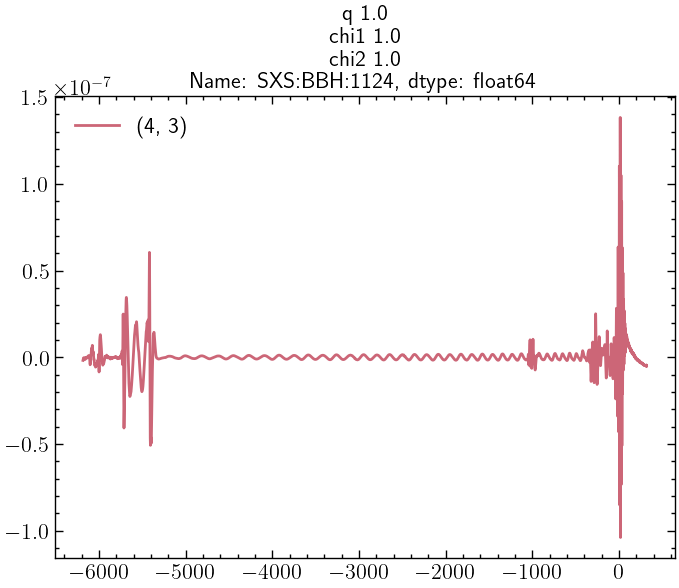

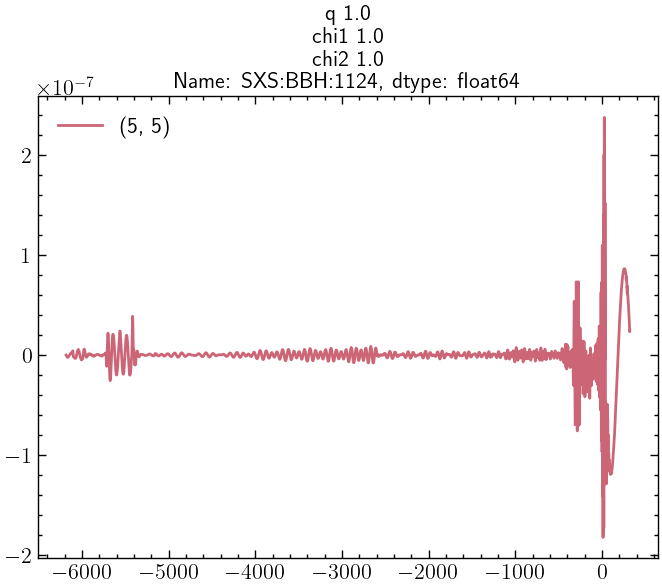

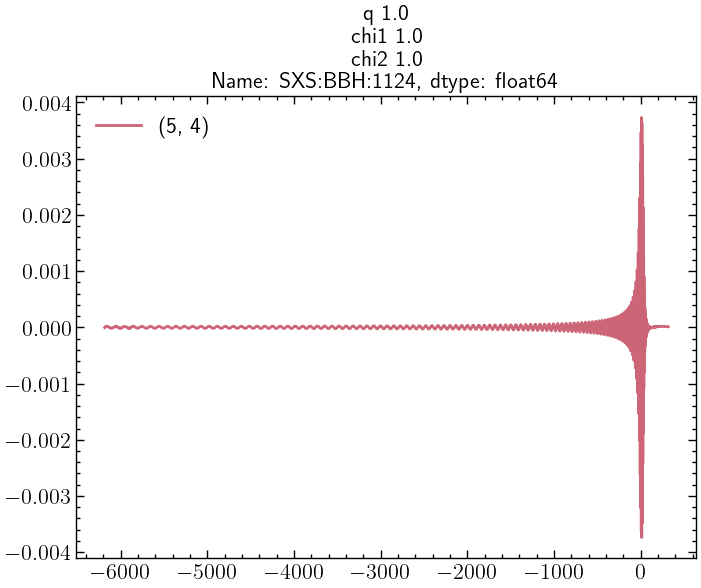

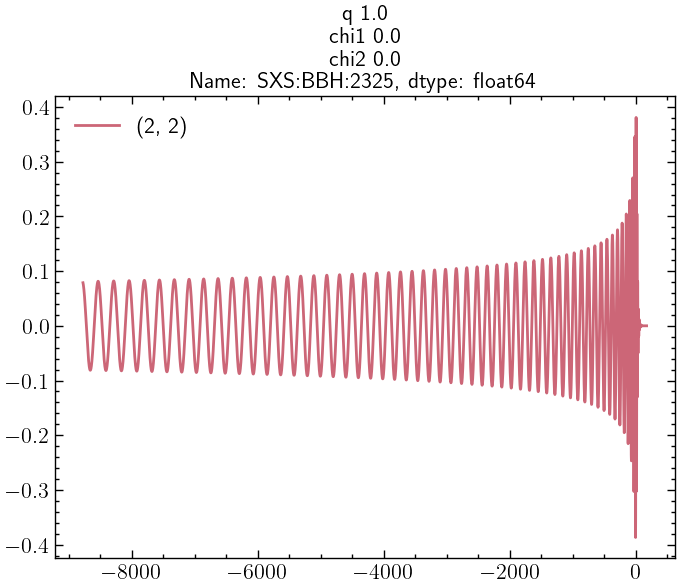

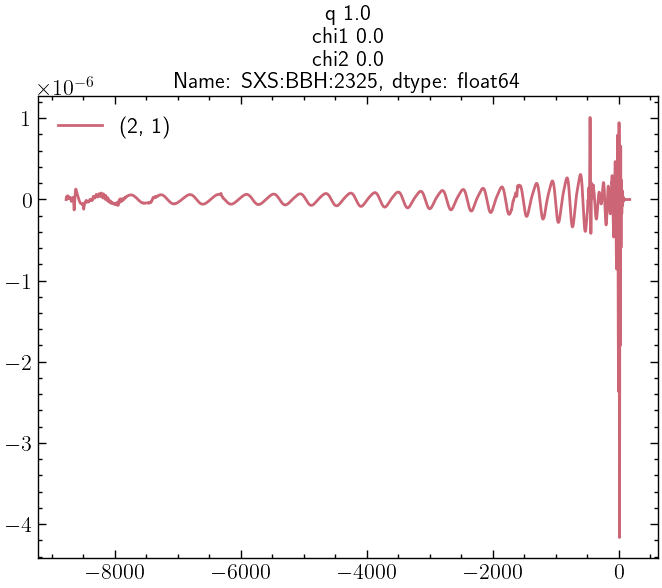

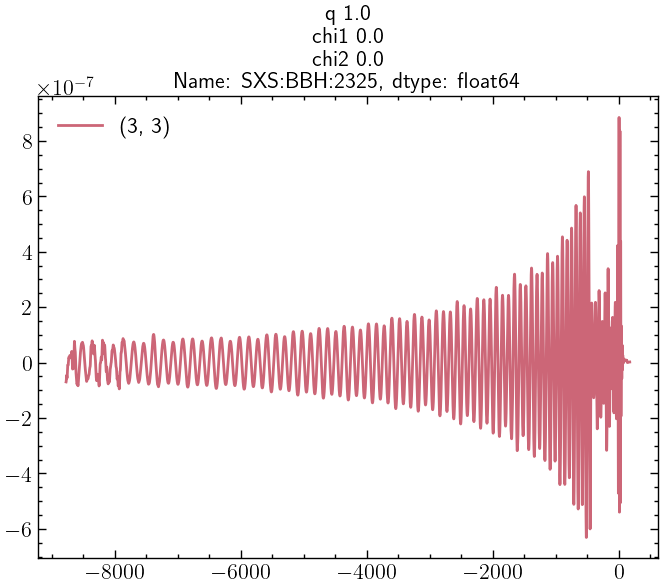

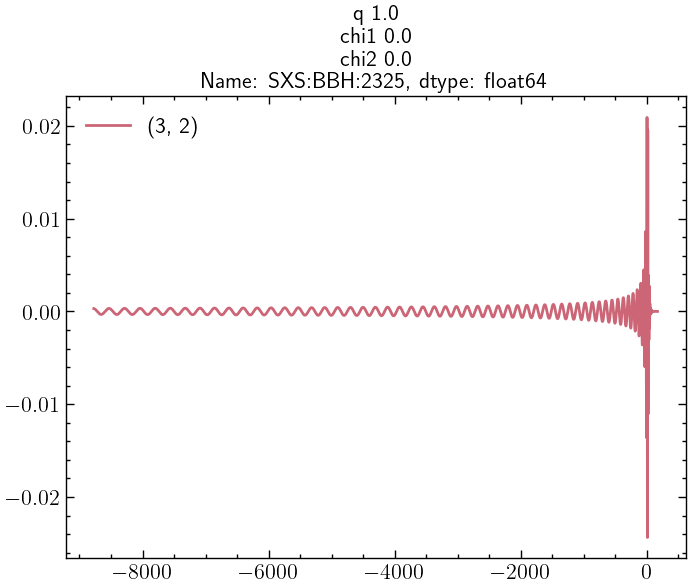

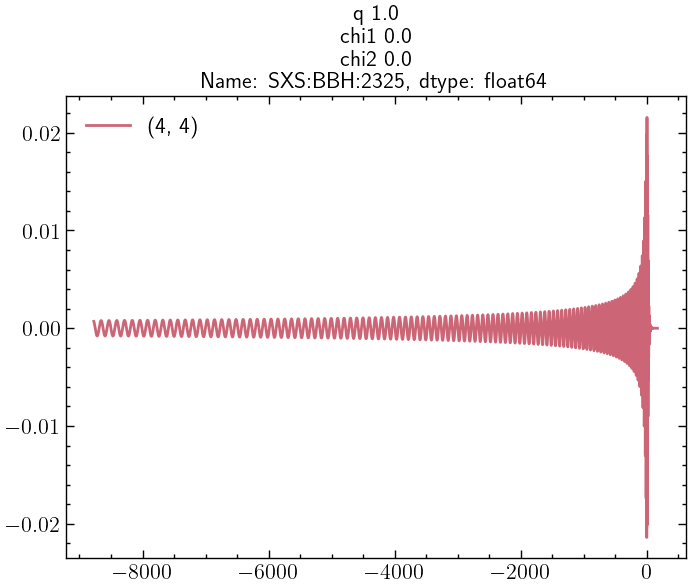

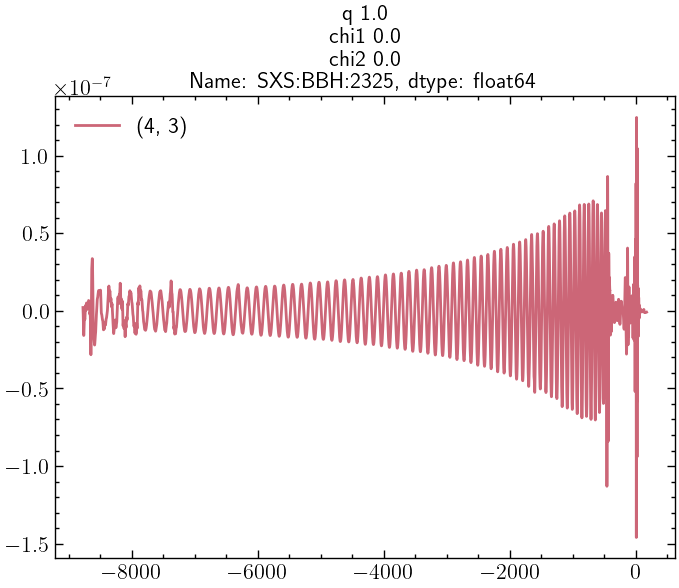

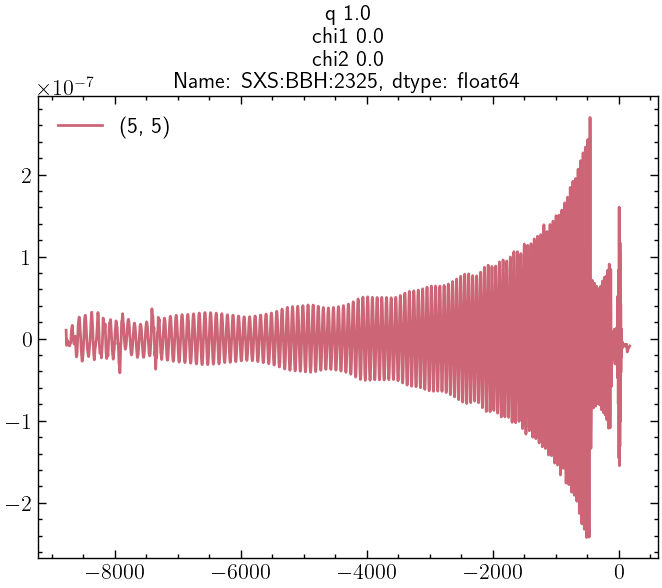

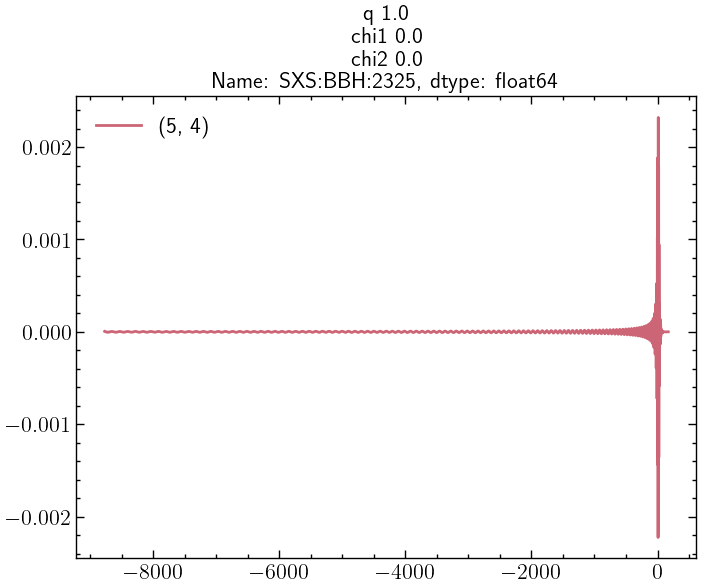

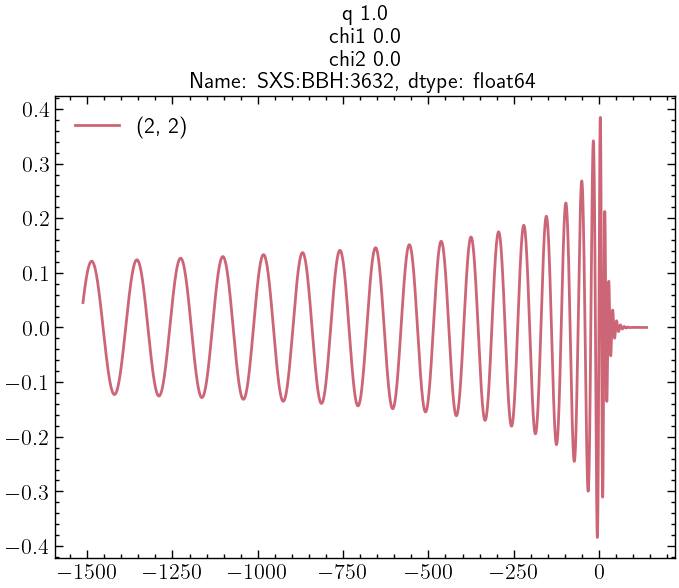

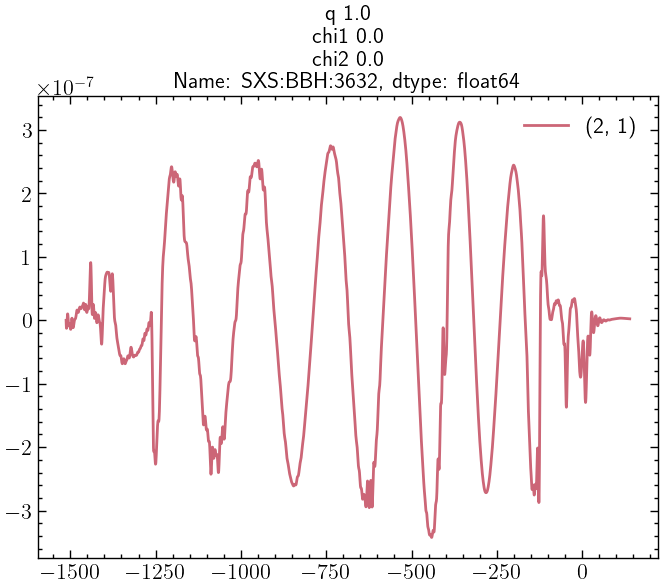

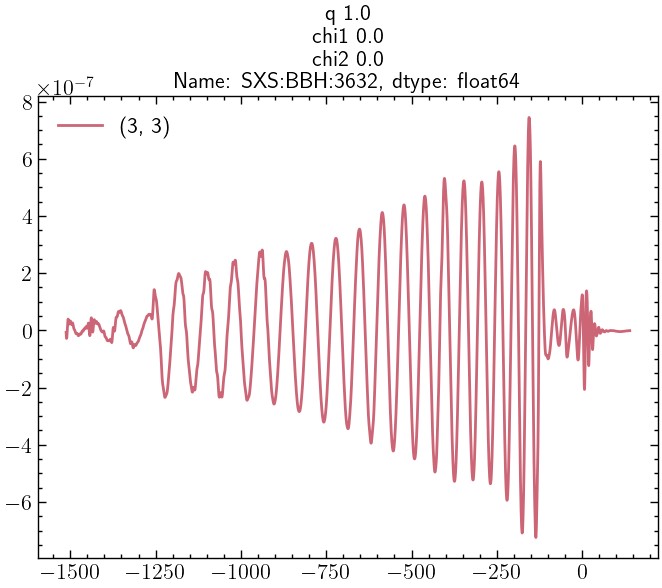

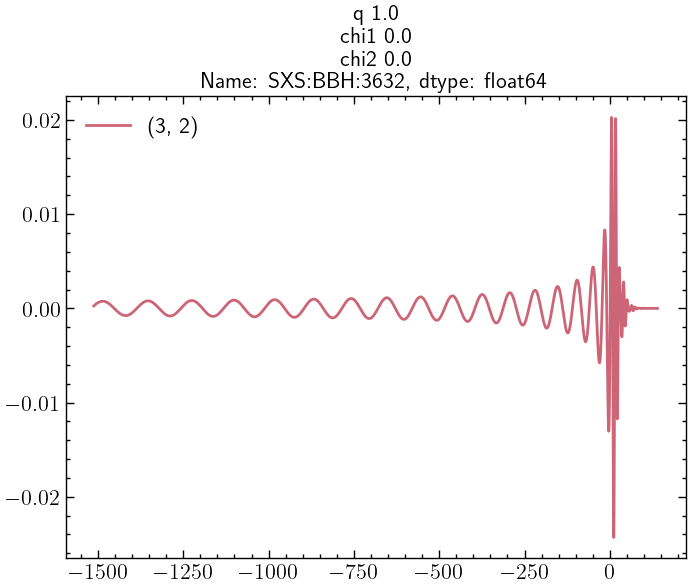

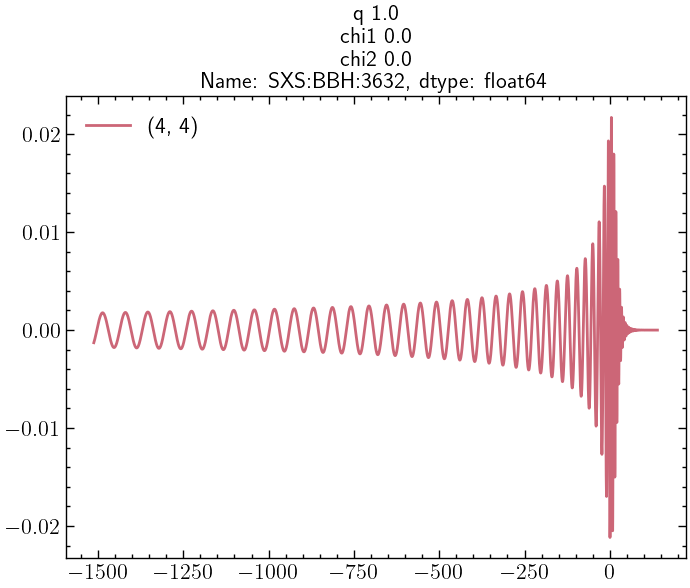

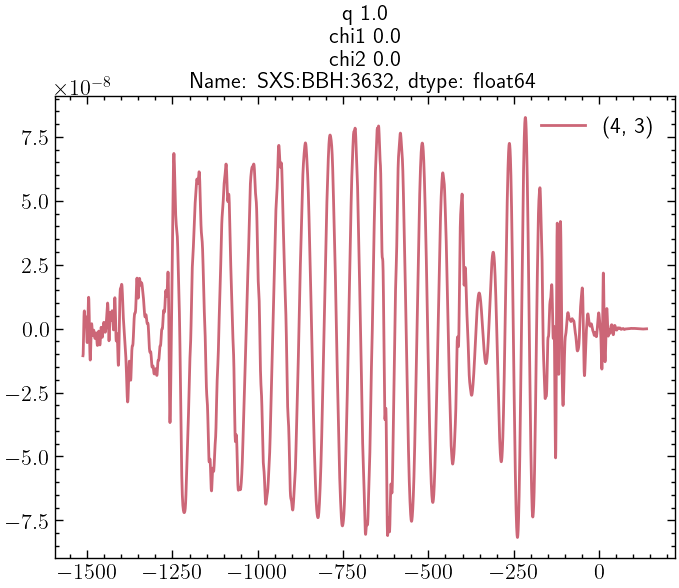

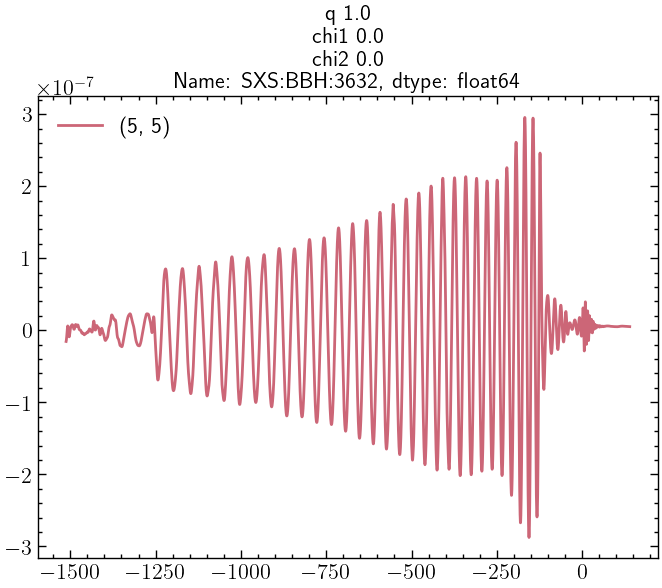

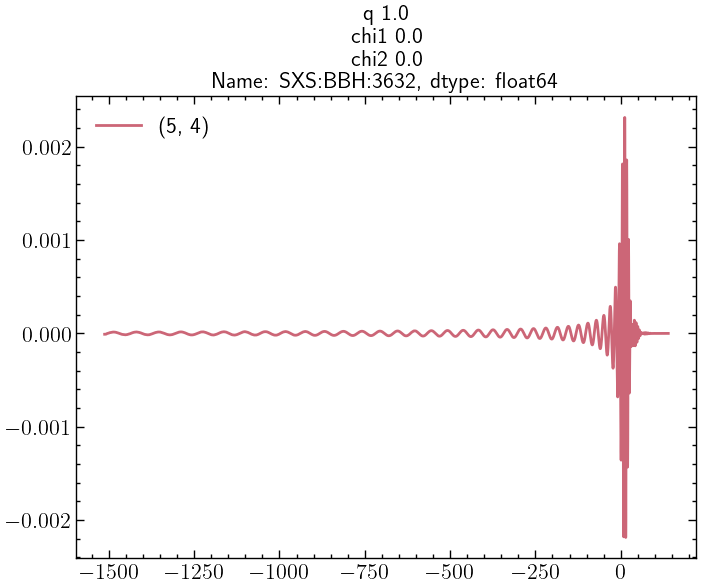

In [53]:
for i, sxs_sim_name in enumerate(random_sxs_sim_names):
    for mode in modes:
        plt.figure()
        plt.plot(sxs_wfs[i].times, sxs_wfs[i].hlms[mode].real, label=f"{mode}")
        plt.legend()
        plt.title(df_qchi1chi2.loc[sxs_sim_name])
        plt.show()
        plt.close()